In [1]:
import sys
%load_ext autoreload
%autoreload 2

import logging
logging.basicConfig()

import bardensr
import tensorflow as tf
import matplotlib.pylab as plt
import collections
import numpy as np
import ray
import numpy.random as npr
import IPython.display
import os
import bardensr.registration.translations_tf
import tqdm.notebook
import bardensr.plotting
import scipy as sp
import skimage.feature
import scipy.spatial
import pkg_resources
import bardensr.misc
import bardensr.barcodediscovery
import bardensr.benchmarks
import dataclasses
import bardensr.spot_calling.barcodesfirst


# bardensr.kernels.sample

In [3]:
X=npr.randn(20,30,20)
pts=(npr.randn(5000,3)*30).astype(int)
rez=bardensr.registration.translations_tf.sample(X,pts,'nearest').numpy()
good=np.where(((pts>=0)&(pts<np.array([20,30,20]))).all(axis=1))[0]
for i in good:
    assert X[tuple(pts[i])]==rez[i]

# bardensr.kernels.hermite_small_translation_1d_padded

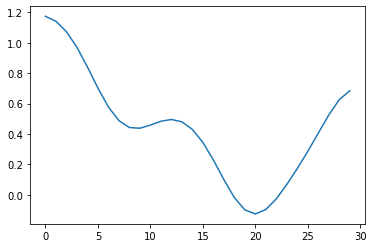

In [4]:
npr.seed(0)
X=npr.randn(30)
X=sp.ndimage.gaussian_filter(X,3)
xs=np.r_[0:len(X)]
plt.plot(xs,X)


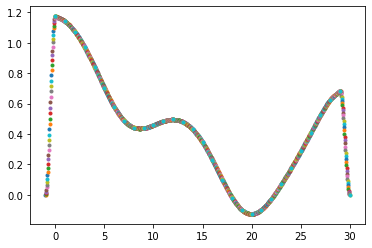

In [5]:
for t in np.r_[0:1:50j]:
    xs2=np.r_[-1:len(X)]+t
    Xr=bardensr.registration.translations_tf.hermite_small_translation_1d_padded(X,0,t).numpy()
    plt.plot(xs2,Xr,'.')

(-2.0, 2.0)

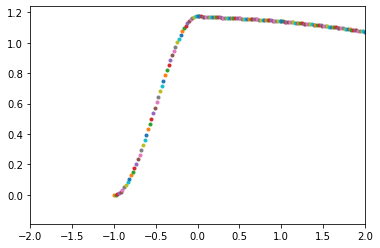

In [6]:
plt.plot(xs,X)

for t in np.r_[0:1:50j]:
    xs2=np.r_[-1:len(X)]+t
    Xr=bardensr.registration.translations_tf.hermite_small_translation_1d_padded(X,0,t).numpy()
    plt.plot(xs2,Xr,'.')
    
plt.xlim(-2,2)

(28.0, 32.0)

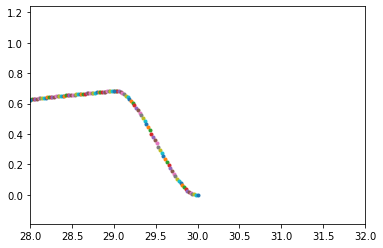

In [7]:
plt.plot(xs,X)

for t in np.r_[0:1:50j]:
    xs2=np.r_[-1:len(X)]+t
    Xr=bardensr.registration.translations_tf.hermite_small_translation_1d_padded(X,0,t).numpy()
    plt.plot(xs2,Xr,'.')
    
plt.xlim(28,32)

# bardensr.kernels.floating_slice

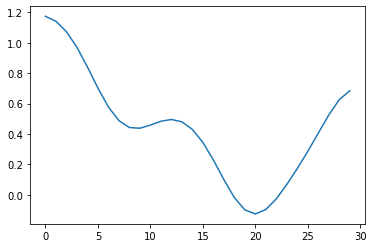

In [8]:
npr.seed(0)
X=npr.randn(30)
X=sp.ndimage.gaussian_filter(X,3)
xs=np.r_[0:len(X)]
plt.plot(xs,X)


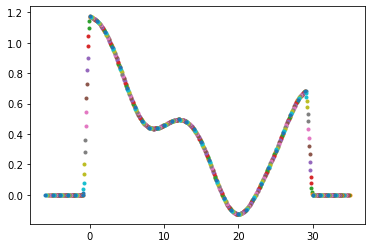

In [9]:
xs=np.r_[0:len(X)]
plt.plot(xs,X)

for t in np.r_[-4:-6:20j]:
    foo=bardensr.registration.translations_tf.floating_slice(X,tf.convert_to_tensor([t]),tf.convert_to_tensor([40]),'hermite').numpy()
    xs=np.r_[t:t+foo.shape[0]]
    plt.plot(xs,foo,'.')